In [1]:
import pandas as pd
import os
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
working_dir = r'../../../outputs/agg'
fname = 'tour_purpose_mode'

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Primary Tour Mode

In [4]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,2.6%,1.0%
HOV2,23.1%,22.0%
HOV3+,21.6%,26.5%
Park,0.4%,0.6%
SOV,33.3%,32.2%
School Bus,3.0%,2.4%
Transit,5.0%,5.8%
Walk,11.0%,9.1%


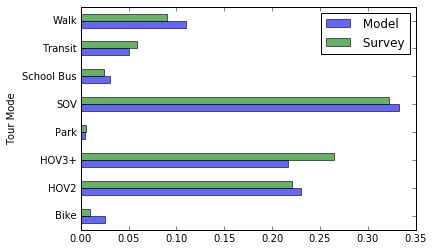

In [5]:
df.plot(kind='barh', alpha=0.6)

# Work Tour Mode

In [6]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'Work']
df_survey = df_survey[df_survey['pdpurp'] == 'Work']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,4.4%,1.9%
HOV2,15.3%,13.9%
HOV3+,7.6%,10.9%
Park,1.6%,1.5%
SOV,59.9%,57.0%
Transit,8.8%,11.0%
Walk,2.5%,3.0%


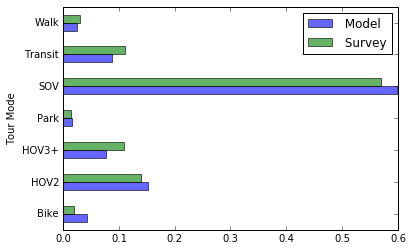

In [7]:
df.plot(kind='barh', alpha=0.6)

# School Tour Mode

In [8]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'School']
df_survey = df_survey[df_survey['pdpurp'] == 'School']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,2.5%,0.4%
HOV2,19.5%,13.5%
HOV3+,29.4%,42.2%
SOV,7.8%,9.1%
School Bus,28.1%,19.5%
Transit,6.7%,8.9%
Walk,6.0%,5.4%


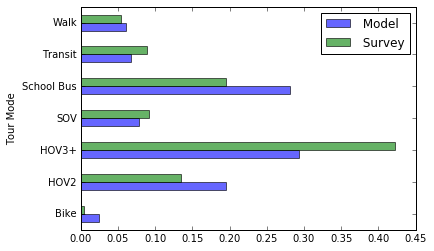

In [9]:
df.plot(kind='barh', alpha=0.6)

# Escort Tour Mode

In [10]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['pdpurp'] == 'Escort']
df_survey = df_survey[df_survey['pdpurp'] == 'Escort']
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,0.6%,0.2%
HOV2,41.0%,44.3%
HOV3+,55.2%,47.3%
SOV,0.6%,5.1%
Transit,0.0%,0.3%
Walk,2.6%,2.8%


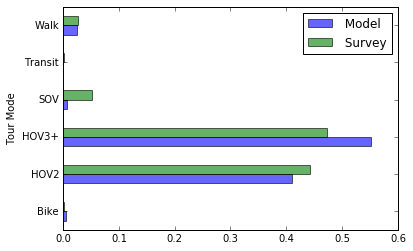

In [11]:
df.plot(kind='barh', alpha=0.6)

# Other Tour Mode

In [12]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[-df_model['pdpurp'].isin(['School','Work','Escort'])]
df_survey = df_survey[-df_survey['pdpurp'].isin(['School','Work','Escort'])]
df_model = (df_model.groupby('tmodetp').sum()[['toexpfac']]/df_model['toexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('tmodetp').sum()[['toexpfac']]/df_survey['toexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='tmodetp', suffixes=['_model','_survey'])
df.columns = ['Tour Mode',' Model',' Survey']
df.index = df['Tour Mode']
df.drop('Tour Mode', axis=1, inplace=True)
df

,Model,Survey
Tour Mode,,
Bike,2.1%,0.7%
HOV2,24.0%,24.7%
HOV3+,20.1%,28.6%
SOV,31.9%,27.5%
Transit,3.8%,3.1%
Walk,18.1%,14.5%


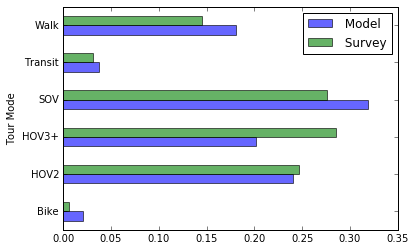

In [13]:
df.plot(kind='barh', alpha=0.6)